In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

con = sqlite3.connect("../satan.db")

print(con.execute("select count(*), benchmark from runs group by benchmark").fetchall())

[(1605, 1)]


In [2]:
results = con.execute("""select
count(id), satisfiable
from runs
where benchmark = (select max(id) from benchmarks)
group by satisfiable""").fetchall()

for number, satisfiable in results:
    print(f"Number: {number}, result: {satisfiable}")

Number: 472, result: -1
Number: 20, result: 0
Number: 1113, result: 1


In [3]:
for solver, runtime, memory in con.execute("select solvers.name as name, avg(runs.runtime) as runtime, avg(runs.memory_usage) as memory from runs join solvers on solvers.id = runs.solver where runs.runtime is not null group by runs.solver").fetchall():
        print(f"Solver {solver} takes on average {runtime} ms and {memory / 1024} MB")       

Solver cadical takes on average 29.36842105263158 ms and 24.523643092105264 MB
Solver minisat takes on average 86.78060606060606 ms and 10.404694602272727 MB
('cadical', 25088, None)
('minisat', 10547, 85)
('cadical', 25088, None)
('minisat', 10547, 74)
('cadical', 25088, None)
('minisat', 10547, 94)
('minisat', 10547, 88)
('cadical', 25210, None)
('minisat', 10547, 84)
('cadical', 25210, None)
('minisat', 10547, 84)
('cadical', 25088, None)
('minisat', 10547, 81)
('cadical', 25088, None)
('minisat', 10547, 78)
('cadical', 25088, None)
('minisat', 10547, 75)
('cadical', 25088, None)
('cadical', 25210, None)


In [110]:
df = pd.read_sql("select solver, avg(runtime) as runtime, satisfiable from runs where satisfiable != 0 and runtime not null group by target,solver", con)

In [111]:
df

,solver,runtime,satisfiable
0,1,106.000000,-1
1,2,114.500000,-1
2,2,67.900000,-1
3,1,10.000000,-1
4,2,89.900000,-1
...,...,...,...
89,2,85.111111,1
90,2,85.000000,-1
91,2,88.777778,-1
92,2,86.800000,-1


Text(0, 0.5, 'solved')

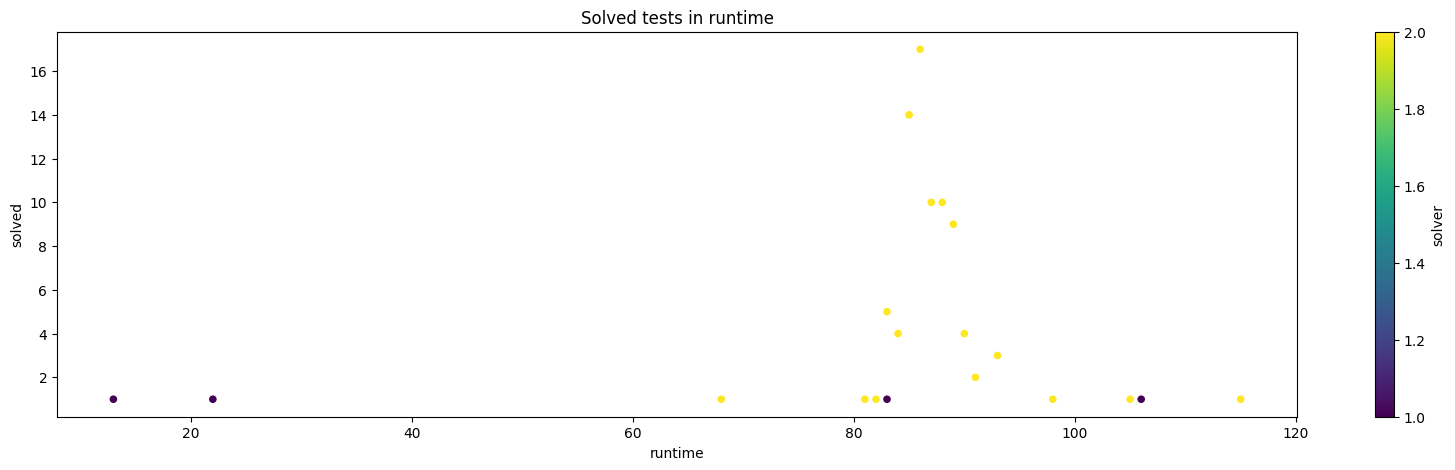

In [136]:
import matplotlib.pyplot as plt
import pylab

plt.close("all")

df1 = df.groupby(by=["solver", pd.cut(df['runtime'], bins=range(10, 500, 1))]).size().reset_index()
df1["runtime"] = df1["runtime"].map(lambda x: x.right)

ax = df1.loc[df1[0] != 0].plot.scatter(y=0, title="Solved tests in runtime", x="runtime", c="solver", colormap='viridis', figsize=(20,5), legend=False)
ax.set_xlabel("runtime")
ax.set_ylabel("solved")

In [114]:
df1

,solver,runtime,0
0,1,15,1
1,1,20,0
2,1,25,1
3,1,30,0
4,1,35,0
...,...,...,...
1989,2,4975,0
1990,2,4980,0
1991,2,4985,0
1992,2,4990,0
